### Modelling with all features

#### 1. Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
df = pd.read_csv('MNDO_full_set_logS.csv')

#### 2. Data Understanding

In [3]:
# Shape of data
print(df.shape)  # (900, 15)

# Data Example
df.head()

(900, 15)


,Compound,G_sol,DeltaG_sol,volume,sol_dip,O_charges,C_charges,Most_neg,Most_pos,Het_charges,MW,SASA,Lsolu_Hsolv,Lsolv_Hsolu,LogS
0,AAEVYOVXGOFMJO-UHFFFAOYSA-N,-27386.0295,108.4003,306.958,2.516480,0.00000,1.26830,-0.49662,0.40835,-1.94254,241.3536,504.517883,12.113,15.231,-4.10
1,ABICJYZKIYUWEE-UHFFFAOYSA-N,-21701.1004,1192.0051,162.730,4.523210,-1.77497,1.26482,-0.43309,0.50939,-1.96130,173.0848,310.521484,10.758,17.200,-2.28
2,ADIMAYPTOBDMTL-UHFFFAOYSA-N,-27724.2400,-526.5967,308.963,5.968560,-0.77653,0.42313,-0.42737,0.37020,-1.54739,286.7171,483.724426,11.343,14.972,-3.95
3,AEXMKKGTQYQZCS-UHFFFAOYSA-N,-19847.0280,72.8581,160.798,0.030508,0.00000,0.00608,-0.12934,0.04961,0.00000,100.2034,307.255127,15.604,17.101,-4.23
4,AFFLGGQVNFXPEV-UHFFFAOYSA-N,-22909.2380,13.9833,225.266,0.006628,0.00000,-0.26705,-0.13063,0.06129,0.00000,140.2680,428.498199,13.418,15.521,-5.51


In [4]:
# Data types
df.dtypes

Compound        object
G_sol          float64
DeltaG_sol     float64
volume         float64
sol_dip        float64
O_charges      float64
C_charges      float64
Most_neg       float64
Most_pos       float64
Het_charges    float64
MW             float64
SASA           float64
Lsolu_Hsolv    float64
Lsolv_Hsolu    float64
LogS           float64
dtype: object

All types of variables are numeric except `Compound` which is a string.

In [5]:
# Detect missing data
df.isnull().sum()

Compound       0
G_sol          0
DeltaG_sol     0
volume         0
sol_dip        0
O_charges      0
C_charges      0
Most_neg       0
Most_pos       0
Het_charges    0
MW             0
SASA           0
Lsolu_Hsolv    0
Lsolv_Hsolu    0
LogS           0
dtype: int64

In [6]:
# Detect duplicated records
df['Compound'].duplicated().sum()

0

There are no missing data or duplicated records.

In [7]:
# Desciptive statistics
df.describe()


,G_sol,DeltaG_sol,volume,sol_dip,O_charges,C_charges,Most_neg,Most_pos,Het_charges,MW,SASA,Lsolu_Hsolv,Lsolv_Hsolu,LogS
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,-25125.884431,1.110091,257.042784,4.117274,-0.885257,0.309034,-0.412793,0.501991,-0.999794,226.012270,425.357822,11.924403,15.247022,-3.006374
std,4541.637409,284.176448,102.087011,2.887121,0.794298,0.584015,0.183705,0.505245,0.702713,96.770699,121.480049,1.395202,0.939056,2.436547
min,-38639.679700,-1634.504600,47.552100,0.000195,-3.889190,-1.361310,-0.852440,0.010950,-4.035830,26.037800,153.395325,8.616000,11.622000,-12.790485
25%,-28251.492575,-64.982550,177.708250,1.904648,-1.412208,-0.036960,-0.477343,0.211533,-1.460173,151.166850,332.927719,11.003250,14.571750,-4.622500
50%,-25193.785250,2.966150,254.070500,3.484820,-0.756525,0.296545,-0.418970,0.382160,-0.957655,225.305000,424.443390,11.707500,15.115500,-2.949000
75%,-21711.647225,72.722125,325.758000,6.040358,-0.320898,0.669570,-0.362857,0.508435,-0.393512,291.269325,504.150314,12.344750,15.780000,-0.933000
max,-11814.194400,2743.525500,607.368000,14.144200,0.000000,2.111850,-0.018700,2.021260,0.311160,498.662000,951.729553,16.154000,18.956000,1.580000


<AxesSubplot:xlabel='LogS', ylabel='Count'>

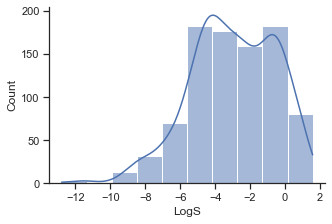

In [8]:
# Histogram of LogS
sns.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(4.5, 3), constrained_layout=True)  
sns.despine()
sns.histplot(df['LogS'],bins = 10,kde =True)
# plt.xlabel('LogS',fontsize=12)
# plt.ylabel('Density',fontsize=12)
# ax.set_title('Histogram of LogS', fontsize = 14, pad =10)


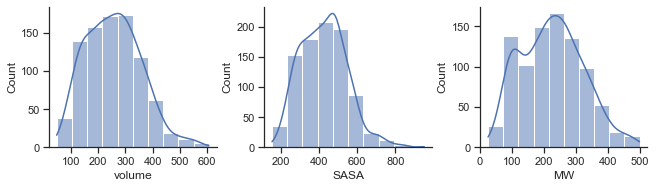

In [9]:
# Histogram of size descriptors
sns.set_theme(style='ticks')
fig, axes = plt.subplots(1,3, figsize=(9, 2.5), constrained_layout=True)  
sns.despine()

sns.histplot(df['volume'], bins = 10, kde=True, kde_kws={'clip': (df['volume'].min(), df['volume'].max())}, ax = axes[0])
axes[0].set_xticks([100,200,300,400,500,600])
sns.histplot(df['SASA'],  bins = 10,kde=True, kde_kws={'clip': (df['SASA'].min(), df['SASA'].max())}, ax = axes[1])
axes[1].set_xticks([200,400,600,800])
sns.histplot(df['MW'], bins = 10, kde=True, kde_kws={'clip': (df['MW'].min(), df['MW'].max())}, ax = axes[2])
axes[2].set_xticks([0,100,200,300,400,500])

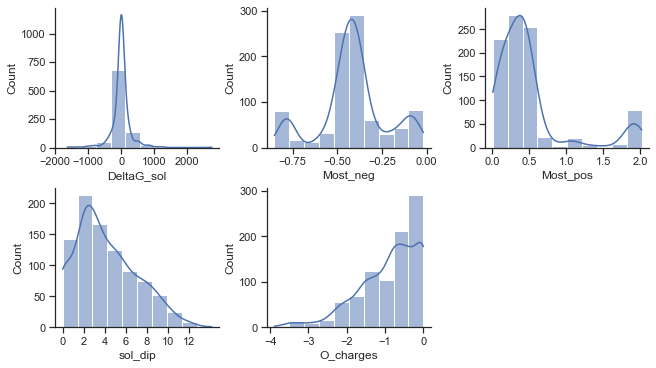

In [10]:
# Histogram of size descriptors
sns.set_theme(style='ticks')
fig, axes = plt.subplots(2,3, figsize=(9, 5), constrained_layout=True)
sns.despine()
sns.histplot(df['DeltaG_sol'], kde=True,bins = 10, kde_kws={'clip': (df['DeltaG_sol'].min(), df['DeltaG_sol'].max())}, ax = axes[0][0])
axes[0][0].set_xticks([-2000,-1000,0,1000,2000])
sns.histplot(df['Most_neg'], kde=True, bins = 10,kde_kws={'clip': (df['Most_neg'].min(), df['Most_neg'].max())}, ax = axes[0][1])

sns.histplot(df['Most_pos'], kde=True, bins = 10,kde_kws={'clip': (df['Most_pos'].min(), df['Most_pos'].max())}, ax = axes[0][2])
axes[0][2].set_xticks([0, 0.5, 1, 1.5,2])
sns.histplot(df['sol_dip'], kde=True, bins = 10,kde_kws={'clip': (df['sol_dip'].min(), df['sol_dip'].max())}, ax = axes[1][0])
axes[1][0].set_xticks([0, 2,4,6,8,10,12])
sns.histplot(df['O_charges'], kde=True, bins = 10, kde_kws={'clip': (df['O_charges'].min(), df['O_charges'].max())}, ax = axes[1][1])
axes[1][1].set_xticks([-4, -3, -2,-1,0])
axes[1][2].set_visible(False)

In [11]:
# # plot histograms of descriptors
# fig = plt.figure(figsize=(12,10), constrained_layout=True)
# axes = []
# for i in range(1,14):
#     axes.append(fig.add_subplot(4, 4, i)) 
#     sns.histplot(df.iloc[:,i])
    
# # Set properties of plots
# axes[0].set_xticks((-35000,-25000,-15000))
# axes[2].set_xticks((150,300,450,600))
# axes[3].set_xticks(range(0,13,3))
# axes[-4].set_xticks(range(50,500,100))
# axes[-3].set_xticks(range(200,900,150))
# axes[-1].set_xticks(range(11,20,2))
# # fig.suptitle('Histograms of descriptors', fontsize= 14)

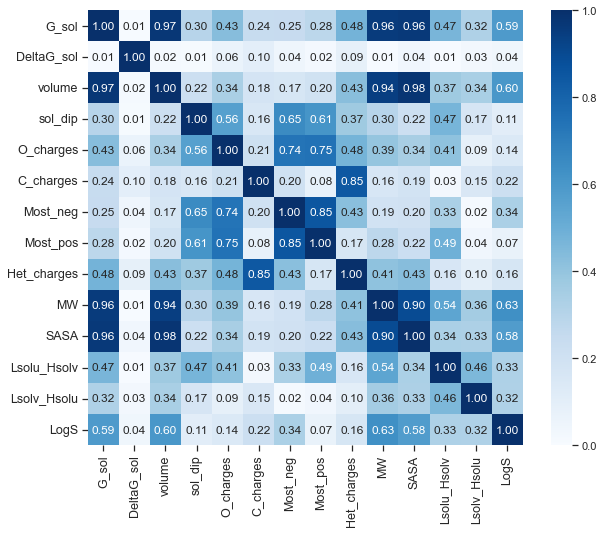

In [12]:
# Correlation Analysis
def corr_graph(Data, threshold, title):
    # Visualise pearson.|r|
    fig, ax = plt.subplots(figsize=(10, 8))  
    ax.set_title(title, fontsize = 14, pad =10)
    plt.xticks(fontsize=12.5)
    plt.yticks(fontsize=12.5)
    corr = Data.corr(method='pearson').abs()
    sns.heatmap(corr, cmap = 'Blues', annot=True, fmt='.2f', square=True, vmin = 0)

    # Get indices where such threshold is crossed; avoid diagonal elements
    R, C = np.where(np.triu(corr, 1) >= threshold)
    # Arrange those in columns and put out as a dataframe
    out_arr = np.column_stack((corr.index[R], corr.columns[C], corr.values[R,C]))
    df_corr = pd.DataFrame(out_arr, columns=[['row_name', 'col_name', 'R']])
    return (df_corr)

df_highcorr = corr_graph(df, threshold=0.89, title='')


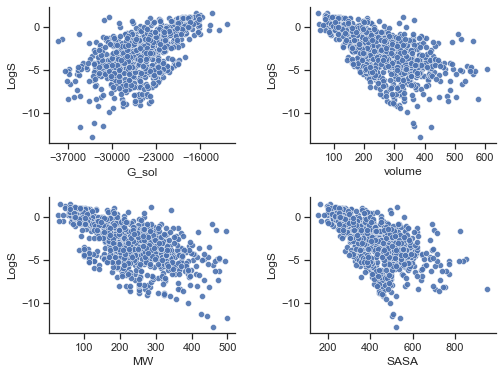

In [13]:
# Plot the relationships between descriptors and target variables
sns.set_theme(style='ticks')
fig, ax = plt.subplots(2,2, figsize = (8,6))
sns.despine()
sns.scatterplot(df['G_sol'],df['LogS'], ax= ax[0][0], alpha = 0.9)
ax[0][0].set_xticks((-37000, -30000, -23000,-16000))
sns.scatterplot(df['volume'],df['LogS'], ax= ax[0][1], alpha = 0.9)
ax[0][1].set_xticks((100,200,300,400,500,600))
sns.scatterplot(df['MW'],df['LogS'], ax= ax[1][0], alpha = 0.9)
ax[1][0].set_xticks((100,200,300,400,500))
sns.scatterplot(df['SASA'],df['LogS'], ax= ax[1][1], alpha = 0.9)
ax[1][1].set_xticks((200,400,600, 800))
plt.subplots_adjust(wspace =0.4, hspace =0.4)

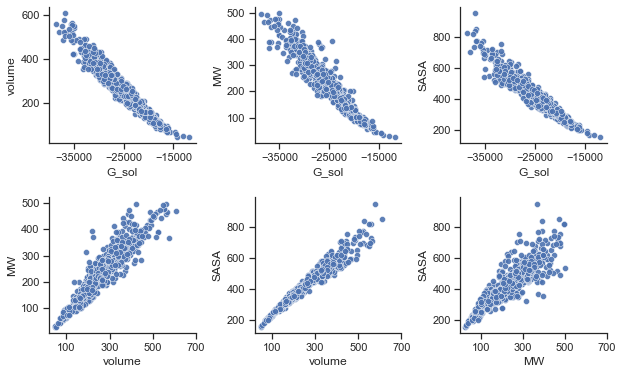

In [14]:
# Plot the highly correlated relationships between descriptors
sns.set_theme(style='ticks')
fig = plt.figure(figsize=(10,6))
axes = []
for i in range(1,len(df_highcorr)+1):
    x = df_highcorr['row_name'].iloc[i-1].values[0]
    y = df_highcorr['col_name'].iloc[i-1].values[0]
    axes.append(fig.add_subplot(2, 3, i)) 
    sns.despine()
    sns.scatterplot(df[x], df[y], alpha = 0.9)
axes[0].set_xticks((-35000,-25000,-15000))
axes[1].set_xticks((-35000,-25000,-15000))
axes[2].set_xticks((-35000,-25000,-15000))
axes[3].set_xticks((100,300,500, 700))
axes[4].set_xticks((100,300,500, 700))
axes[5].set_xticks((100,300,500, 700))
plt.subplots_adjust(wspace =0.4, hspace =0.4)

#### 3. Data Preparation

In [15]:
# Delete the Compound column
data = df.drop(['Compound'], axis=1)
display(data)

,G_sol,DeltaG_sol,volume,sol_dip,O_charges,C_charges,Most_neg,Most_pos,Het_charges,MW,SASA,Lsolu_Hsolv,Lsolv_Hsolu,LogS
0,-27386.0295,108.4003,306.958,2.516480,0.00000,1.26830,-0.49662,0.40835,-1.94254,241.3536,504.517883,12.113,15.231,-4.10000
1,-21701.1004,1192.0051,162.730,4.523210,-1.77497,1.26482,-0.43309,0.50939,-1.96130,173.0848,310.521484,10.758,17.200,-2.28000
2,-27724.2400,-526.5967,308.963,5.968560,-0.77653,0.42313,-0.42737,0.37020,-1.54739,286.7171,483.724426,11.343,14.972,-3.95000
3,-19847.0280,72.8581,160.798,0.030508,0.00000,0.00608,-0.12934,0.04961,0.00000,100.2034,307.255127,15.604,17.101,-4.23000
4,-22909.2380,13.9833,225.266,0.006628,0.00000,-0.26705,-0.13063,0.06129,0.00000,140.2680,428.498199,13.418,15.521,-5.51000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-24315.3222,753.0879,202.519,6.560480,-1.81560,0.21840,-0.38463,0.53157,-0.75381,198.1348,355.737152,10.486,15.852,-1.46000
896,-27442.6916,105.5227,326.791,2.921690,-1.53865,0.83186,-0.49242,0.50455,-1.91131,265.3084,515.781372,12.313,15.025,-2.15490
897,-22668.0223,-17.7237,218.713,0.034090,0.00000,-0.59212,-0.10752,0.07833,0.00000,168.2378,389.868378,11.902,14.375,-4.62000
898,-29382.3655,-65.6502,331.903,9.327500,-2.10108,0.81956,-0.78846,1.90831,-2.01373,310.3270,530.750732,10.639,14.418,-2.96000


In [16]:
# Assign input variables and output variable
X = data.drop(['LogS'], axis=1)
y = data['LogS']

In [17]:
# Declare the cross-validation strategies
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=0)

#### 4. Data Modelling + Cross Validation (All features)

##### Custom scoring functions

In [18]:
# Define an evaluation metric as a percentage within 0.7 errors
from sklearn.metrics import make_scorer
def within_range1(LogS_actual, LogS_pred):
    x=0
    if isinstance(LogS_actual, pd.Series):
        LogS_actual = LogS_actual.values
    if isinstance(LogS_pred, pd.Series):
        LogS_pred = LogS_pred.values
    for i in range(len(LogS_pred)):
        if (LogS_actual[i]-0.7)<= LogS_pred[i] <= (LogS_actual[i]+0.7):
            x+=1 
    return(float(x)/(len(LogS_pred)))

In [19]:
# Define an evaluation metric as a percentage within 1 errors
def within_range2(LogS_actual, LogS_pred):
    x=0
    if isinstance(LogS_actual, pd.Series):
        LogS_actual = LogS_actual.values
    if isinstance(LogS_pred, pd.Series):
        LogS_pred = LogS_pred.values
    for i in range(len(LogS_pred)):
        if (LogS_actual[i]-1)<= LogS_pred[i] <= (LogS_actual[i]+1):
            x+=1 
    return(float(x)/(len(LogS_pred)))

In [20]:
# Define scorer objects that can be used in GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
mse = make_scorer(mean_squared_error, greater_is_better=False)
r2 = make_scorer(r2_score, greater_is_better=True)
metric1 = make_scorer(within_range1, greater_is_better=True)
metric2 = make_scorer(within_range2, greater_is_better=True)
scoring = {'mse': mse, 'r2':r2, 'metric1': metric1, 'metric2':metric2}

##### 4.1 Multiple Linear Regression (MLR)

Multiple Linear Regression does not need to do parameter tuning, so the model is trained directly.

In [21]:
# MLR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,cross_validate
import statsmodels.api as sm

# Define a pipeline that contains scaling and modelling
pipe_mlr = Pipeline([("scaler", StandardScaler()), ("mlr", LinearRegression())])

# 5-fold Cross validation
cv_mlr = cross_validate(pipe_mlr, X, y, cv =cv, scoring=scoring, return_train_score=True, error_score="raise")

# Print metrics
mlr_rmse = np.sqrt(-cv_mlr['test_mse']).mean()
mlr_r2 = cv_mlr['test_r2'].mean()
mlr_metric1 = cv_mlr['test_metric1'].mean()
mlr_metric2 = cv_mlr['test_metric2'].mean()
print('MLR:')
print('RMSE:', mlr_rmse)
print('R^2:  ', mlr_r2)
print('%Log±0.7:', mlr_metric1)
print('%Log±1.0:', mlr_metric2)


MLR:
RMSE: 1.1567091864724603
R^2:   0.7715882611766469
%Log±0.7: 0.4955555555555556
%Log±1.0: 0.6422222222222221


##### 4.2 Ridge regression

The Ridge regression is based on MLR with an L2 penalty added. 

In [22]:
# Ridge (default parameter)
from sklearn.linear_model import Ridge

# Define a pipeline that contains scaling and modelling
pipe_default_ridge = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge())])
# 5-fold Cross validation
cv_default_ridge = cross_validate(Ridge(), X, y, cv =cv, scoring=scoring, return_train_score=True, error_score="raise")
# Print metrics
print('Default Ridge:')
print('RMSE:', np.sqrt(-cv_default_ridge['test_mse']).mean())
print('R^2:  ', cv_default_ridge['test_r2'].mean())
print('%Log±0.7:', cv_default_ridge['test_metric1'].mean())
print('%Log±1.0:', cv_default_ridge['test_metric2'].mean())

Default Ridge:
RMSE: 1.1648271974900801
R^2:   0.768301777857326
%Log±0.7: 0.4877777777777778
%Log±1.0: 0.6355555555555557


The parameter `alpha` controls the strength of the L2 penalty and needs to be tunned.

In [23]:
# Ridge regression with optimised parameters
from sklearn.linear_model import Ridge
# Set the alpha values
grid_ridge = {"ridge__alpha": np.linspace(0.1, 15, 1000)}  # Define the grid
# Define a pipeline that contains scaling and modelling
pipe_ridge = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge(max_iter=10000000))])

#  Grid search + 5-fold cross-validation
model_ridge = GridSearchCV(estimator=pipe_ridge, param_grid=grid_ridge, cv=cv, n_jobs=-1, scoring=scoring, refit='mse', return_train_score= True)
model_ridge.fit(X,y)
# cv result
cv_ridge = pd.DataFrame(model_ridge.cv_results_)

# View the coefficients and intercept
best_alpha_ridge = model_ridge.best_params_['ridge__alpha']
# print('coefficients:','\n', pd.Series(model_ridge.best_estimator_[-1].coef_, index=X.columns))
# print('intercept:', model_ridge.best_estimator_[-1].intercept_)
print('Best alpha:', best_alpha_ridge)

Best alpha: 1.6064064064064065


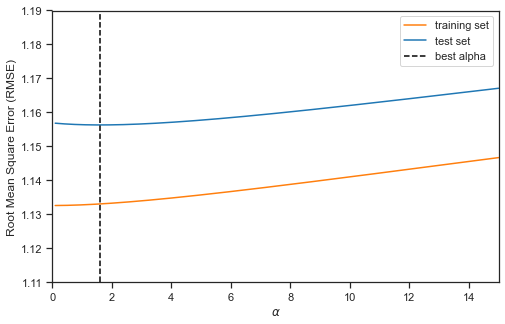

In [24]:
# Visualisation of RMSEs of different alphas values
# fig, ax = plt.subplots(1,2, figsize = (10,6), tight_layout=True)
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(cv_ridge['param_ridge__alpha'], np.sqrt(-cv_ridge['mean_train_mse']), color="tab:orange", label = 'training set')
ax.plot(cv_ridge['param_ridge__alpha'], np.sqrt(-cv_ridge['mean_test_mse']), color="tab:blue", label = 'test set')
ax.axvline(best_alpha_ridge, linestyle="--", color="black", label="best alpha")
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"Root Mean Square Error (RMSE)")
ax.set_ylim((1.11,1.19))
ax.set_xlim((0,15))
ax.legend()

In [25]:
# Print all metrics
cv_ridge_metrics = cv_ridge.iloc[model_ridge.best_index_,:]
ridge_rmse = np.sqrt(-cv_ridge_metrics['mean_test_mse'])
ridge_r2 = cv_ridge_metrics['mean_test_r2']
ridge_metric1 = cv_ridge_metrics['mean_test_metric1']
ridge_metric2 = cv_ridge_metrics['mean_test_metric2']
print('Optimised Ridge:')
print('RMSE:', ridge_rmse)
print('R^2:  ', ridge_r2)
print('%Log±0.7:', ridge_metric1)
print('%Log±1.0:', ridge_metric2)

Optimised Ridge:
RMSE: 1.156314452778615
R^2:   0.7717854661534508
%Log±0.7: 0.4966666666666667
%Log±1.0: 0.6455555555555554


##### 4.3 Lasso regression

The Lasso regression is based on MLR with an L1 penalty added. 

In [26]:
# Lasso (default parameter)
from sklearn.linear_model import Lasso
# Define a pipeline that contains scaling and modelling
pipe_default_lasso = Pipeline([("scaler", StandardScaler()), ("lasso", Lasso())])
# 5-fold Cross validation
cv_default_lasso = cross_validate(pipe_default_lasso, X, y, cv =cv, scoring=scoring, return_train_score=True, error_score="raise")
# Print metrics
print('Default Lasso:')
print('RMSE:', np.sqrt(-cv_default_lasso['test_mse']).mean())
print('R^2:  ', cv_default_lasso['test_r2'].mean())
print('%Log±0.7:', cv_default_lasso['test_metric1'].mean())
print('%Log±1.0:', cv_default_lasso['test_metric2'].mean())

Default lasso:
RMSE: 2.133910603843696
R^2:   0.2274256219165162
%Log±0.7: 0.23888888888888887
%Log±1.0: 0.32555555555555554


The parameter `alpha` controls the strength of the L1 penalty and needs to be tunned.

In [27]:
# Lasso regression with optimised parameters
from sklearn.linear_model import Lasso
# Set the alpha values
grid_lasso = {"lasso__alpha": np.linspace(0.00001, 0.1, 1000)}
# Define a pipeline that contains scaling and modelling
pipe_lasso = Pipeline([("scaler", StandardScaler()), ("lasso", Lasso(max_iter=10000000))])

#  Grid search + 5-fold cross-validation
model_lasso = GridSearchCV(estimator=pipe_lasso, param_grid=grid_lasso, cv=cv, n_jobs=-1, scoring=scoring, refit='mse', return_train_score= True)
model_lasso.fit(X,y)
# cv result
cv_lasso = pd.DataFrame(model_lasso.cv_results_)
# View the coefficients and intercept
best_alpha_lasso = model_lasso.best_params_['lasso__alpha']
# print('coefficients:','\n', pd.Series(model_lasso.best_estimator_[-1].coef_, index=X.columns))
# print('intercept:', model_lasso.best_estimator_[-1].intercept_)
print('Best alpha:', best_alpha_lasso)

Best alpha: 0.0015113513513513516


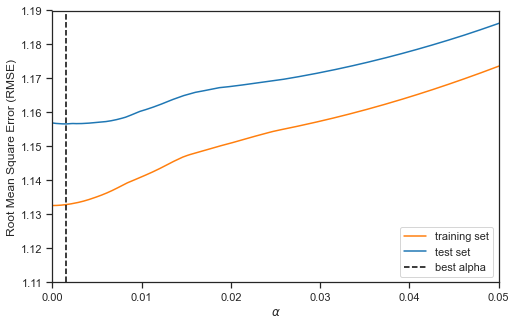

In [28]:
# Visualisation of the RMSEs metrics of different alphas values
# fig, ax = plt.subplots(1,2, figsize = (10,6), tight_layout=True)
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(cv_lasso['param_lasso__alpha'], np.sqrt(-cv_lasso['mean_train_mse']), color="tab:orange", label = 'training set')
ax.plot(cv_lasso['param_lasso__alpha'], np.sqrt(-cv_lasso['mean_test_mse']), color="tab:blue", label = 'test set')
ax.axvline(best_alpha_lasso, linestyle="--", color="black", label="best alpha")
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"Root Mean Square Error (RMSE)")
ax.set_ylim((1.11,1.19))
ax.set_xlim((0,0.05))
ax.legend()
plt.show()

In [29]:
# Print all metrics
cv_lasso_metrics = cv_lasso.iloc[model_lasso.best_index_,:]
lasso_rmse = np.sqrt(-cv_lasso_metrics['mean_test_mse'])
lasso_r2 = cv_lasso_metrics['mean_test_r2']
lasso_metric1 = cv_lasso_metrics['mean_test_metric1']
lasso_metric2 = cv_lasso_metrics['mean_test_metric2']
print('Optimised Lasso:')
print('RMSE:', lasso_rmse)
print('R^2:  ', lasso_r2)
print('%Log±0.7:', lasso_metric1)
print('%Log±1.0:', lasso_metric2)

Optimised Lasso:
RMSE: 1.1566109632302382
R^2:   0.7716189599270953
%Log±0.7: 0.4988888888888889
%Log±1.0: 0.6411111111111111


#### 4.4 Partial Least Squares (PLS)

PLS transforms the input and target variables by projection in order to find a linear relationship between them.

In [30]:
# PLS (default parameter)
from sklearn.cross_decomposition import PLSRegression
# 5-fold Cross validation
cv_default_pls = cross_validate(PLSRegression(scale=True), X, y, cv =cv, scoring=scoring, return_train_score=True, error_score="raise")
# Print metrics
print('Default PLS:')
print('RMSE:', np.sqrt(-cv_default_pls['test_mse']).mean())
print('R^2:  ', cv_default_pls['test_r2'].mean())
print('%Log±0.7:', cv_default_pls['test_metric1'].mean())
print('%Log±1.0:', cv_default_pls['test_metric2'].mean())

Default PLS:
RMSE: 1.3572715740416494
R^2:   0.6840060289191344
%Log±0.7: 0.4177777777777777
%Log±1.0: 0.5722222222222222


The `n_components` parameter of the PLS regression model needs to be tunned. It implies the number of components, i.e. the number of newly transformed features.

In [31]:
# PLS (parameter tuning)
from sklearn.cross_decomposition import PLSRegression
# Set grid parameters
grid_pls = {"n_components":range(1,len(X.columns)+1)}

#  Grid search + 5-fold cross-validation
model_pls = GridSearchCV(PLSRegression(scale=True), param_grid=grid_pls, cv=cv, n_jobs=-1, scoring=scoring, refit='mse', return_train_score= True)
model_pls.fit(X,y)
# Print the best parameter
n_components_pls = model_pls.best_params_['n_components']
print('Best n_components:', n_components_pls)   # {'n_components': 11}
cv_pls = pd.DataFrame(model_pls.cv_results_)

# # View the coefficients and intercept
# print('coefficients:\n',model_pls.best_estimator_.coef_)

Best n_components: 11


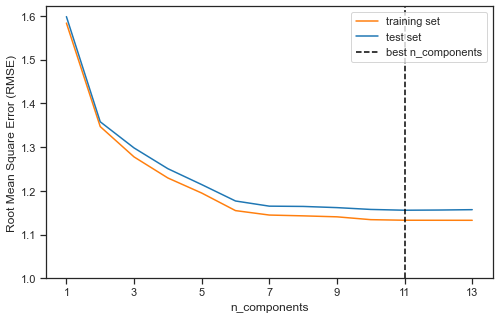

In [32]:
# Visualisation of the performance of different n_components values
plt.subplots(figsize=(8, 5))
plt.plot(cv_pls['param_n_components'],np.sqrt(-cv_pls['mean_train_mse']) , label = 'training set', color = 'tab:orange')
plt.plot(cv_pls['param_n_components'],np.sqrt(-cv_pls['mean_test_mse']), label = 'test set', color = 'tab:blue')
plt.axvline(n_components_pls, linestyle="--", color="black", label="best n_components")
plt.xlabel("n_components")
plt.ylabel(r"Root Mean Square Error (RMSE)")
plt.xticks(np.arange(1,14,2))
plt.yticks(np.arange(1,1.7,0.1))
plt.legend(loc='upper right')
# # _ = plt.title(
# #     r"$RMSE$ score for different n_components"
# # )

In [33]:
# Print all metrics
cv_pls_metrics = cv_pls.iloc[model_pls.best_index_,:]
pls_rmse = np.sqrt(-cv_pls_metrics['mean_test_mse'])
pls_r2 = cv_pls_metrics['mean_test_r2']
pls_metric1 = cv_pls_metrics['mean_test_metric1']
pls_metric2 = cv_pls_metrics['mean_test_metric2']
print('Optimised PLS:')
print('RMSE:', pls_rmse)
print('R^2:  ', pls_r2)
print('%Log±0.7:', pls_metric1)
print('%Log±1.0:', pls_metric2)

Optimised PLS:
RMSE: 1.1556333642170544
R^2:   0.7720916701863609
%Log±0.7: 0.49444444444444446
%Log±1.0: 0.6444444444444444


##### 4.5 Random Forest (RF)

In [34]:
# Random Forest (default parameter)
from sklearn.ensemble import RandomForestRegressor
# 5-fold Cross validation
cv_default_rf = cross_validate(RandomForestRegressor(random_state=0), X, y, cv =cv, scoring=scoring, return_train_score=True, error_score="raise")
# Print metrics
print('Default RF:')
print('RMSE:', np.sqrt(-cv_default_rf['test_mse']).mean())
print('R^2:  ', cv_default_rf['test_r2'].mean())
print('%Log±0.7:', cv_default_rf['test_metric1'].mean())
print('%Log±1.0:', cv_default_rf['test_metric2'].mean())

Default RF:
RMSE: 0.948943839385786
R^2:   0.8427011715972835
%Log±0.7: 0.6044444444444446
%Log±1.0: 0.76


The parameter `n_estimators` controls the number of decision trees included in the RF model. 

The parameter `max_features` controls the maximum number of features that the model will consider when splitting.


In [35]:
# Random Forest (parameter tuning)
from sklearn.ensemble import RandomForestRegressor

# Set grid parameters
grid_rf = {"n_estimators":[100,150,200,250,300,350,400,450,500],
           "max_features": np.arange(2,14,1)}

# Grid Search + 5-fold-cv cross validation
model_rf = GridSearchCV(RandomForestRegressor(random_state=0), param_grid=grid_rf, cv=cv, n_jobs=-1, scoring=scoring, refit='mse', return_train_score= True)
model_rf.fit(X.to_numpy(), y)

# Print the best parameter
cv_rf = pd.DataFrame(model_rf.cv_results_)
print('Best parameter for Random Forest:', model_rf.best_params_)   #{'max_features': 9, 'n_estimators': 300}

Best parameter for Random Forest: {'max_features': 9, 'n_estimators': 300}


<AxesSubplot:xlabel='param_max_features', ylabel='param_n_estimators'>

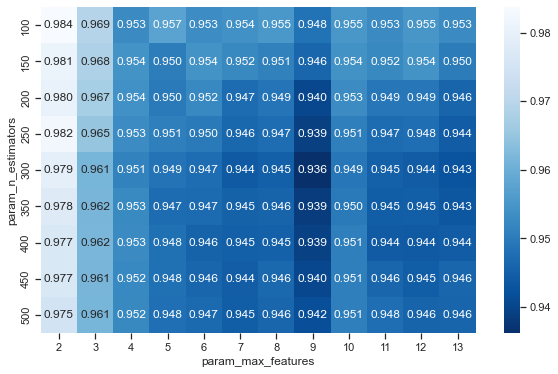

In [36]:
# Visualise the RMSEs of models with different parameters 
plt.figure(figsize=(10,6))
heatmap_rf = cv_rf[['param_n_estimators','param_max_features']]
heatmap_rf['mean_test_rmse']=np.sqrt(-cv_rf['mean_test_mse'])
heatmap_rf = heatmap_rf.pivot('param_n_estimators','param_max_features','mean_test_rmse')
# Plot the mean scores corresponding to different parameters
sns.heatmap(heatmap_rf, annot=True,fmt='.3f',square=True,cmap = 'Blues_r')

Text(0, 0.5, 'Feature')

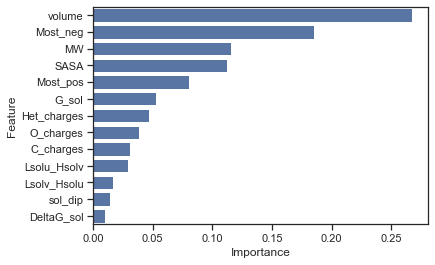

In [37]:
# Visualise feature importances
importances_values_rf = model_rf.best_estimator_.feature_importances_
importances_rf = pd.DataFrame(importances_values_rf, columns=["importance"])
feature_data = pd.DataFrame(X.columns, columns=["feature"])
importances_rf = pd.concat([feature_data, importances_rf], axis=1).sort_values(["importance"], ascending=False)
sns.barplot(x="importance", y="feature", data = importances_rf, color="b")
plt.xlabel('Importance')
plt.ylabel('Feature')

In [38]:
# Print all metrics
cv_rf_metrics = cv_rf.iloc[model_rf.best_index_,:]
rf_rmse = np.sqrt(-cv_rf_metrics['mean_test_mse'])
rf_r2 = cv_rf_metrics['mean_test_r2']
rf_metric1 = cv_rf_metrics['mean_test_metric1']
rf_metric2 = cv_rf_metrics['mean_test_metric2']
print('Optimised RF:')
print('RMSE:', rf_rmse)
print('R^2:  ', rf_r2)
print('%Log±0.7:', rf_metric1)
print('%Log±1.0:', rf_metric2)

Optimised RF:
RMSE: 0.9361792238447874
R^2:   0.848280736517774
%Log±0.7: 0.6188888888888889
%Log±1.0: 0.7611111111111111


#### 4.6 Extra Trees (ET)

Compared to Random Forest, Extra Tree is less time-consuming to model because it partitions the nodes completely randomly and does not compute the best partition.

In [39]:
# Extra Trees (default parameter)
from sklearn.ensemble import ExtraTreesRegressor
# 5-fold Cross validation
cv_default_et = cross_validate(ExtraTreesRegressor(random_state=0), X, y, cv =cv, scoring=scoring, return_train_score=True, error_score="raise")
# Print metrics
print('Default ET:')
print('RMSE:', np.sqrt(-cv_default_et['test_mse']).mean())
print('R^2:  ', cv_default_et['test_r2'].mean())
print('%Log±0.7:', cv_default_et['test_metric1'].mean())
print('%Log±1.0:', cv_default_et['test_metric2'].mean())

Default ET:
RMSE: 0.9192345077062649
R^2:   0.8528966730657637
%Log±0.7: 0.64
%Log±1.0: 0.7677777777777777


The parameter `n_estimators` controls the number of decision trees included in the ET model. 

The parameter `max_features` controls the maximum number of features that the model will consider when splitting.

In [40]:
# Extra Trees (parameter tuning)
from sklearn.ensemble import ExtraTreesRegressor

# Set grid parameters
grid_et = {"n_estimators":[100,150,200,250,300,350,400,450,500],
           "max_features": np.arange(2,14,1)}

# Grid Search + 5-fold-cv cross validation
model_et = GridSearchCV(ExtraTreesRegressor(random_state=0), param_grid=grid_et, cv=cv, n_jobs=-1, scoring=scoring, refit='mse', return_train_score= True)
model_et.fit(X.to_numpy(), y)

# Print the Best parameter
cv_et = pd.DataFrame(model_et.cv_results_)
print('Best parameter for Extra Trees:', model_et.best_params_)   #{'max_features': 13, 'n_estimators': 150}

Best parameter for Extra Trees: {'max_features': 13, 'n_estimators': 150}


<AxesSubplot:xlabel='param_max_features', ylabel='param_n_estimators'>

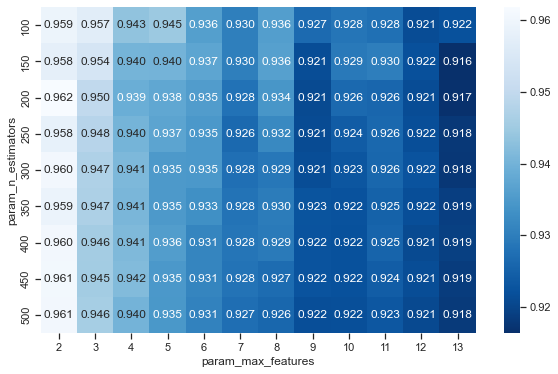

In [41]:
# Visualise the RMSEs of models with different parameters 
plt.figure(figsize=(10,6))
heatmap_et = cv_et[['param_n_estimators','param_max_features']]
heatmap_et['mean_test_rmse']=np.sqrt(-cv_et['mean_test_mse'])
heatmap_et = heatmap_et.pivot('param_n_estimators','param_max_features','mean_test_rmse')
# Plot the mean scores corresponding to different parameters
sns.heatmap(heatmap_et, annot=True,fmt='.3f',square=True,cmap = 'Blues_r')

Text(0, 0.5, 'Feature')

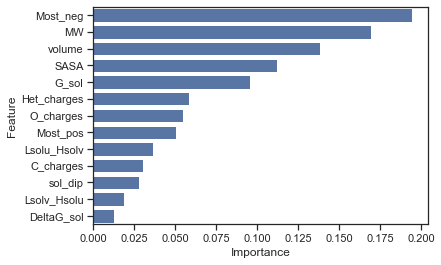

In [42]:
# Visualise feature importances
importances_values_et = model_et.best_estimator_.feature_importances_
importances_et = pd.DataFrame(importances_values_et, columns=["importance"])
feature_data = pd.DataFrame(X.columns, columns=["feature"])
importances_et = pd.concat([feature_data, importances_et], axis=1).sort_values(["importance"], ascending=False)
sns.barplot(x="importance", y="feature", data = importances_et, color="b")
plt.xlabel('Importance')
plt.ylabel('Feature')

In [43]:
# Print all metrics
cv_et_metrics = cv_et.iloc[model_et.best_index_,:]
et_rmse = np.sqrt(-cv_et_metrics['mean_test_mse'])
et_r2 = cv_et_metrics['mean_test_r2']
et_metric1 = cv_et_metrics['mean_test_metric1']
et_metric2 = cv_et_metrics['mean_test_metric2']
print('Optimised ET:')
print('RMSE:', et_rmse)
print('R^2:  ', et_r2)
print('%Log±0.7:', et_metric1)
print('%Log±1.0:', et_metric2)

Optimised ET:
RMSE: 0.9163503005185729
R^2:   0.8546744691981301
%Log±0.7: 0.6444444444444445
%Log±1.0: 0.7788888888888889


##### 4.7 Gradient Boosted Regression Trees (GBRT)

GBRT differs from the Random Forest in that it tries to correct the errors of the previous tree when building the decision trees. 

In [44]:
# Gradient Boosted Regression Trees (default parameter)
from sklearn.ensemble import GradientBoostingRegressor
# 5-fold Cross validation
cv_default_gbrt = cross_validate(GradientBoostingRegressor(random_state=0), X, y, cv =cv, scoring=scoring, return_train_score=True, error_score="raise")
# Print metrics
print('Default GBRT:')
print('RMSE:', np.sqrt(-cv_default_gbrt['test_mse']).mean())
print('R^2:  ', cv_default_gbrt['test_r2'].mean())
print('%Log±0.7:', cv_default_gbrt['test_metric1'].mean())
print('%Log±1.0:', cv_default_gbrt['test_metric2'].mean())

Default GBRT:
RMSE: 0.9436228771961215
R^2:   0.8456343852957163
%Log±0.7: 0.5877777777777777
%Log±1.0: 0.75


There are a number of parameters in the model that can be tuned, in our study we focused on tuning the following five parameters, as shown below.
- `n_estimators` —  The number of decision trees included in the GBRT model.  
- `learning_rate` —  The learning rate of the GBRT model is used to control how strongly each tree corrects the errors of the previous tree. This parameter and the `n_estimators` parameter need to be adjusted at the same time, because the lower the `learning_rate` the more decision trees need to be built to achieve the correction of errors.
- `max_features` — The maximum number of features that the model will consider when splitting.
- `max_depth` — The maximum depth of each decision tree. In the GBRT model, this is usually set very small, typically no more than 5.
- `subsample` — This parameter is used to control the sub-sampling rate. The use of subsampling reduces variance and prevents overfitting, but may increase the bias of the model fit. The value is usually around 0.8.


In [45]:
# Gradient Boosted Regression Trees (parameter tuning)
from sklearn.ensemble import GradientBoostingRegressor

# Set grid parameters
grid_gbrt = {"n_estimators":np.arange(200, 2100, 100),  # np.arange(200, 2100, 100)
             "learning_rate":[0.03], # [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
             "subsample": [0.8],
             "max_features": np.arange(2, X.shape[1]+1,1), # np.arange(2, X.shape[1]+1,1)
             "max_depth": [3]}    # np.arange(3, 8, 1) 

# Grid Search + 5-fold-cv cross validation
model_gbrt = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid=grid_gbrt, cv=cv, n_jobs=-1, scoring=scoring, refit='mse', return_train_score= True)
model_gbrt.fit(X.to_numpy(), y)

# Print the best parameter
cv_gbrt = pd.DataFrame(model_gbrt.cv_results_)
print('Best parameter for GBRT:', model_gbrt.best_params_)   #{'learning_rate': 0.03, 'max_depth': 3, 'max_features': 3, 'n_estimators': 1400, 'subsample': 0.8}

Best parameter for GBRT: {'learning_rate': 0.03, 'max_depth': 3, 'max_features': 3, 'n_estimators': 1400, 'subsample': 0.8}


Text(0, 0.5, 'Feature')

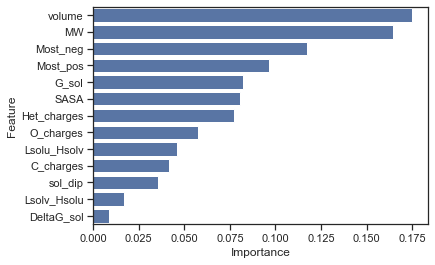

In [46]:
# Visualise feature importances
importances_values_gbrt = model_gbrt.best_estimator_.feature_importances_
importances_gbrt = pd.DataFrame(importances_values_gbrt, columns=["importance"])
feature_data = pd.DataFrame(X.columns, columns=["feature"])
importances_gbrt = pd.concat([feature_data, importances_gbrt], axis=1).sort_values(["importance"], ascending=False)
sns.barplot(x="importance", y="feature", data = importances_gbrt, color="b")
plt.xlabel('Importance')
plt.ylabel('Feature')

In [47]:
# Print all metrics
cv_gbrt_metrics = cv_gbrt.iloc[model_gbrt.best_index_,:]
gbrt_rmse = np.sqrt(-cv_gbrt_metrics['mean_test_mse'])
gbrt_r2 = cv_gbrt_metrics['mean_test_r2']
gbrt_metric1 = cv_gbrt_metrics['mean_test_metric1']
gbrt_metric2 = cv_gbrt_metrics['mean_test_metric2']
print('Optimised GBRT:')
print('RMSE:', gbrt_rmse)
print('R^2:  ', gbrt_r2)
print('%Log±0.7:', gbrt_metric1)
print('%Log±1.0:', gbrt_metric2)

Optimised GBRT:
RMSE: 0.8793629793022949
R^2:   0.8666493322490567
%Log±0.7: 0.65
%Log±1.0: 0.7822222222222222


##### 4.8 Support Vector Regression (SVR)

In [48]:
# SVR (default parameter)
from sklearn.svm import SVR  

# Define a pipeline that contains scaling and modelling
pipe_default_svr = Pipeline([("scaler", StandardScaler()), ("svr", SVR(kernel='rbf'))])
# 5-fold Cross validation
cv_default_svr = cross_validate(pipe_default_svr, X, y, cv =cv, scoring=scoring, return_train_score=True, error_score="raise")

# Print metrics
print('Default SVR:')
print('RMSE:', np.sqrt(-cv_default_svr['test_mse']).mean())
print('R^2:  ', cv_default_svr['test_r2'].mean())
print('%Log±0.7:', cv_default_svr['test_metric1'].mean())
print('%Log±1.0:', cv_default_svr['test_metric2'].mean())


Default SVR:
RMSE: 1.0740518515612003
R^2:   0.8022515097661287
%Log±0.7: 0.6177777777777778
%Log±1.0: 0.7411111111111112


The SVR model built using the rbf kernel requires the tuning of 2 hyperparameters, as shown below.
- `gamma` —  This parameter controls the width of the rbf kernel. The higher the `gamma`, the greater the influence of points near the hyperplane. A low `gamma` means that more distant points are also considered to be at the decision boundary.
- `C` —  A regularization parameter that controls how strongly to penalise data with large prediction errors. The larger the `C` the more curved the decision boundary the more likely it is to overfit. The smaller the `C` the smoother the decision boundary and the more likely it is to underfit \citep{refsvr}.


In [49]:
# SVR (parameter tuning)
# Define a pipeline
from sklearn.svm import SVR  
pipe_svr = Pipeline([("scaler", StandardScaler()), ("svr", SVR())])
# Set grid parameters
grid_svr = [
            # {"svr__kernel":["poly"],
            #  "svr__C": np.arange(1,20,1), # 6
            #  "svr__gamma": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,0.08, 0.09, 0.1],  # 0.02
            #  "svr__degree": [2,3,4]}, # 3
            # {"svr__kernel": ["linear"],
            #  "svr__C":np.arange(1,30,1)},  # 19
            # {"svr__kernel":["sigmoid"],
            #  "svr__C": np.arange(1,20,1), # 19
            #  "svr__gamma": np.arange(0.001, 0.011, 0.001)},  # 0.004
            {"svr__kernel": ["rbf"],
             "svr__C":np.arange(10,20,1),
             "svr__gamma":[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,0.1]}
            ]
# Grid Search + 10-cv cross validation
model_svr = GridSearchCV(pipe_svr, param_grid=grid_svr, cv=cv, n_jobs=-1, scoring=scoring, refit='mse', return_train_score= True)
model_svr.fit(X.to_numpy(), y)

# Print the best parameter
print('Best parameter for SVR :', model_svr.best_params_)   #{'svr__C': 16, 'svr__gamma': 0.03, 'svr__kernel': 'rbf'}
cv_svr = pd.DataFrame(model_svr.cv_results_)

Best parameter for SVR : {'svr__C': 16, 'svr__gamma': 0.03, 'svr__kernel': 'rbf'}


Text(0.5, 48.5, 'C')

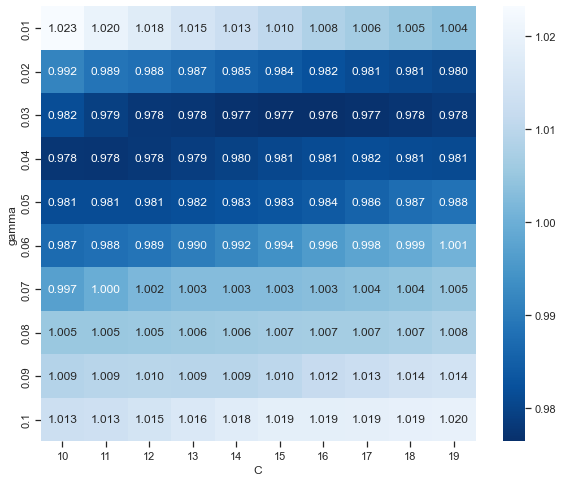

In [50]:
# Visualise the RMSEs of models with different parameters 
plt.figure(figsize=(10,8))
heatmap_svr = cv_svr[['param_svr__C','param_svr__gamma']]
heatmap_svr['mean_test_rmse'] = np.sqrt(-cv_svr['mean_test_mse'])
heatmap_svr = heatmap_svr.pivot('param_svr__gamma','param_svr__C','mean_test_rmse')

# Plot the mean scores corresponding to different parameters
sns.heatmap(heatmap_svr, annot=True,fmt='.3f',square=True,cmap = 'Blues_r')
plt.ylabel('gamma')
plt.xlabel('C')

In [51]:
# Print all metrics
cv_svr_metrics = cv_svr.iloc[model_svr.best_index_,:]
svr_rmse = np.sqrt(-cv_svr_metrics['mean_test_mse'])
svr_r2 = cv_svr_metrics['mean_test_r2']
svr_metric1 = cv_svr_metrics['mean_test_metric1']
svr_metric2 = cv_svr_metrics['mean_test_metric2']
print('Optimised SVR:')
print('RMSE:', svr_rmse)
print('R^2:  ', svr_r2)
print('%Log±0.7:', svr_metric1)
print('%Log±1.0:', svr_metric2)

Optimised SVR:
RMSE: 0.9764438407886167
R^2:   0.8366700564400412
%Log±0.7: 0.6288888888888888
%Log±1.0: 0.7644444444444444


#### 5. Final Evaluation
Compare all metrics of models with all features.

In [52]:
# Compare models with optimised parameters
df_metrics = pd.DataFrame({
    "RMSE":    [mlr_rmse, ridge_rmse, lasso_rmse, pls_rmse, rf_rmse, et_rmse, gbrt_rmse, svr_rmse],
    "R^2":     [mlr_r2, ridge_r2, lasso_r2, pls_r2, rf_r2, et_r2, gbrt_r2, svr_r2],
    "%log±0.7":[mlr_metric1, ridge_metric1, lasso_metric1, pls_metric1, rf_metric1, et_metric1, gbrt_metric1, svr_metric1],
    "%log±1.0":[mlr_metric2, ridge_metric2, lasso_metric2, pls_metric2, rf_metric2, et_metric2, gbrt_metric2, svr_metric2]},    
    index= ["MLR", "Ridge", "Lasso", "PLS", "RF", "ET", "GBRT", "SVR"]
    )
df_metrics

,RMSE,R^2,%log±0.7,%log±1.0
MLR,1.156709,0.771588,0.495556,0.642222
Ridge,1.156314,0.771785,0.496667,0.645556
Lasso,1.156611,0.771619,0.498889,0.641111
PLS,1.155633,0.772092,0.494444,0.644444
RF,0.936179,0.848281,0.618889,0.761111
ET,0.916350,0.854674,0.644444,0.778889
GBRT,0.879363,0.866649,0.650000,0.782222
SVR,0.976444,0.836670,0.628889,0.764444


The best model is the GBRT model.